In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Load the dataset
data = pd.read_csv('https://gist.githubusercontent.com/stefanerben/8f166d2d285645ac50568eea9324ba05/raw/3cba3c0db042fab4d9c577c8e8c751cca5ee2d0f/comments-rating.csv')

# Extract the text and target columns
text = data['msg']
target = data['scam']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.2, random_state=42)


In [ ]:
%%time

# Create and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test_tfidf)

CPU times: user 2.26 s, sys: 1.98 ms, total: 2.26 s
Wall time: 3.37 s


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9052924791086351
Precision: 0.91324200913242
Recall: 0.8032128514056225
F1 Score: 0.8547008547008547
ROC AUC Score: 0.8813505621633656


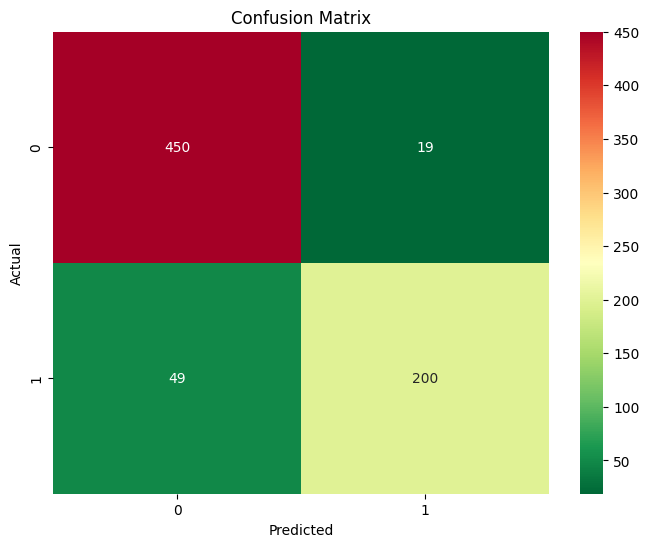

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="RdYlGn_r")

plt.title('Confusion Matrix')
plt.show()


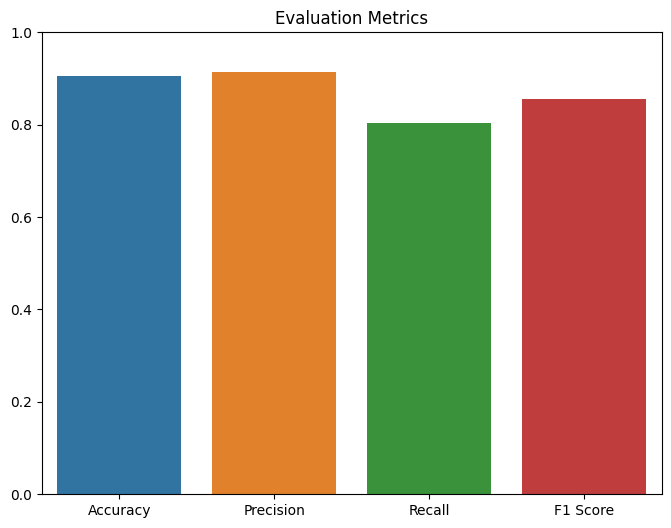

In [ ]:
# Create a bar plot for the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)
plt.ylim([0, 1])
plt.title('Evaluation Metrics')
plt.show()